# Change log

## PyWake 2.2 (March 26, 2021)
### New features and API changes
- All DeficitModels should inherrit either `WakeDeficitModel` or `BlockageDeficitModel`
- All Sites are now subclasses of XRSite
- WeightedSum SuperpositionModel reimplemented to be more efficient
- TurbulenceModels now take a RotorAvgModel as optional input. This allow PyWake to use different RotorAvgModels for wake and turbulence.
- Validation feature updated, see [here](https://topfarm.pages.windenergy.dtu.dk/PyWake/notebooks/exercises/Validation.html)
- The Power/Ct curve functionality of `WindTurbines` has been updated to support multidimensional Power and Ct curves, e.g. curves depending on turbulence intensity, air density, yaw misalignment, operational mode etc. This means that instantiating `WindTurbines` and `OneTypeWindTurbines` with the old set of arguments, i.e. `name, diameter, hub_height, ct_func, power_func, power_unit`, is deprecated. Use the the new `WindTurbine` and `Windturbines` classes with the arguments `name, diameter, hub_height, powerCtFunction` instead, see [here](https://topfarm.pages.windenergy.dtu.dk/PyWake/notebooks/WindTurbines.html). Backward compatibility is ensured (with runtime warning) for most use cases.
The `powerCtFunction` can be one of the classes from py_wake.wind_turbines.power_ct_functions, i.e.
    - `PowerCtFunction`
    - `PowerCtTabular`
    - `PowerCtFunctionList`
    - `PowerCtNDTabular`
    - `PowerCtXr`
    - `CubePowerSimpleCt`
- Support for time series of wd and ws, see [here](https://topfarm.pages.windenergy.dtu.dk/PyWake/notebooks/RunWindFarmSimulation.html#Time-series). Possible use cases:
    - Time-dependent inflow, e.g. measurements of wd, ws, ti, shear, density, etc.
    - Time-dependent operation, e.g. periods of failure or maintaince of a wind turbine
- Added support for load surrogates to predict wind turbine loads

### New models
- BlockageDeficitModels (see [here](https://topfarm.pages.windenergy.dtu.dk/PyWake/notebooks/EngineeringWindFarmModels.html#Blockage-deficit-models)
    - SelfSimilarityDeficit2020
    - HybridInduction
    - RankineHalfBody
    - VortexCylinder
    - VortexDipole
    - Rathmann
 - DeflectionModels
    - FugaDeflection (requires Fuga look-up tables, `UL`, `UT`, `VL`, `VT`)
 - GroundModels
     - Mirror
     - MirrorSquaredSum

## PyWake 2.1 (September 14, 2020)


### New features and API changes
- New xarray data structure
    - LocalWind, SimulationResult and FlowMap are now `xarray.Dataset`-objects with some additional methods and attributes
    - `simulationResult.aep()` now returns a `xarray.DataArray` with aep for all wind turbines, wind directions and wind speeds. To get the total AEP as before, use `simulationResult.aep().sum()`
    - New general XRSite where the site is defined as an xarray with the following structure:
        - Required data variables: 
            - P(probability) or f(sector frequency), A(Weibull scale), k(Weibull shape)
        - Optional data variables: 
            - WS(defaults to reference wind speed, ws), TI(turbulence intensity), SpeedUp, Turning
        - All data variables may be constant or dependent on any of:
            - ws (reference wind speed)
            - wd (reference wind direction)
            - position in terms of
                - gridded 2D position, (x,y)
                - gridded 3D position, (x,y,z)
                - wt position, (i)
- [Include effects of neighbouring wind farms](Optimization.ipynb#Pregenerated-site-with-wake-effects-from-neighbouring-wind-farms) in site (wind resource) to speed up optimization of a wind farm with neighbouring farms
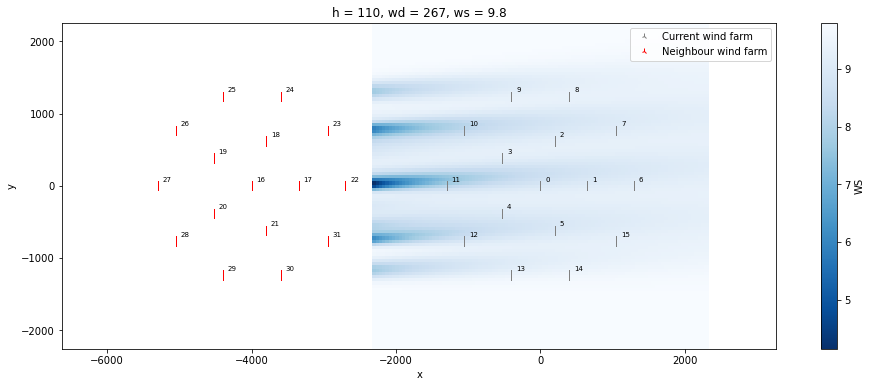
- Vertical flow map via the [YZGrid](RunWindFarmSimulation.ipynb#YZGrid)
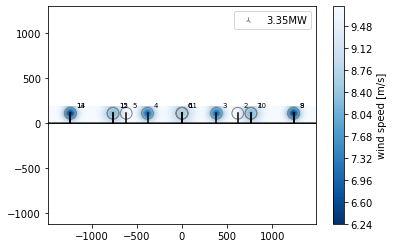


### New models

- New `RotorAverageModel`, see [here](EngineeringWindFarmModels.ipynb#Rotor-average-models). The default model, `RotorCenter`, behaves as before as it estimates the rotor-average wind speed from the wind speed at the rotor center. Other models, however, provides a more accurate estimate based on multiple points on the cost of computation. The `CGIRotorAvg(4)` and `CGIRotorAvg(7)` with 4 and 7 points, respectively, provides good compromises between accuracy and computational cost.
- Deficit model: 
    - [GCLDeficit](EngineeringWindFarmModels.ipynb#GCLDeficit): The Gunner Larsen semi-analytical wake model
- Superposition model:
    - WeightedSum A weighted sum approach taking wake convection velocity into account. The model is so far only applicable to the gaussian models. The model is based on "A momentum-conserving wake superposition method for wind farm power prediction" by Haohua Zong and Fernando Porté-Agel, J. Fluid Mech. (2020), vol. 889, A8; doi:10.1017/jfm.2020.77


## PyWake 2.0 (April 15, 2020)

- New structure
    - Purpose:
        - Easier combination of different models for flow propagation, wake and blockage deficit, superposition, wake deflection and turbulence
        - More consistent interface to and support for engineering models and PyWake-Rans
    - Changes
        - `WakeModel` class refactored mainly into the `WindFarmModel`s `EngineeringWindFarmModel` and `PropagateDownwind`
        - `WindFarmModel`s, e.g. `NOJ`, `Fuga`, `BastankhahGaussian` returns a `SimulationResult` containing the results as well as an AEP and a flow_map method. See the QuickStart tutorial
        - and many more
    - Backward compatibility
        - AEP Calculator works as before, but is now deprecated
        - Lower level interfaces and implementations has changed
- New documentation matching the new structure
- Optional blockage deficit models and implementation of the SelfSimilarity model
- Optional wake deflection models and implementation of a model by Jimenez